# TMDb Movie Data Investigation
By: Samuel D. Boadi<br/>
[LinkedIn Profile](https://www.linkedin.com/in/samuel-duah-boadi-8ab46944/)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>       
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> TMDb Movie data was pulled from [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?datasetId=138). <br/>
The dataset contains information about 10,000 movies generated from The Movie Database. 


<a id='questions'></a>
### Questions for Analysis
<ul>
<li>Which genres are most popular from year to year?</li>
<li>What kinds of properties are associated with movies that have high revenues</li>
<li>What's the trend of number of movies produced through the period?</li>
</ul>

In [1]:
# import statements for all of the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# including a 'magic word' so that visualizations are plotted
#   inline with the notebook.
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load data and print out first 5 rows. 
movie_df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


A quick investigation of the dataset. This is to assess the quality and build intuition about the dataset.<br/> Identifying instances of missing or possibly errant data are important for cleaning.
1. The number of samples and columns.
2. Check for null values in some selected columns and not the entire datasets.
3. Check for duplicates in the dataset.
4. Inspect the data types in the dataset.

The reason for checking null values in some selected columns and not the entire dataset is get as much data for analysis. The no null values in the selected columns are needed to answer our <a href="#questions">questions</a>.

The columns in the dataset that we are interested in, to check for null values in them are:<a id='imp'></a>
> id, popularity, original_title,
genres, production_companies, release_date,
vote_count, vote_average, release_year,
budget_adj, revenue_adj

In [3]:
# Print the number of samples and columns in the dataset
print('The number of samples in the movie dataset is', movie_df.shape[0], 
     '\nand the number of columns is', movie_df.shape[1])

The number of samples in the movie dataset is 10866 
and the number of columns is 21


In [4]:
# Columns interested in for analysis
imp_columns = ['id', 'popularity', 'original_title', 'genres', 
                     'production_companies', 'release_date', 
                     'vote_count', 'vote_average', 'release_year', 
                     'budget_adj', 'revenue_adj']

In [5]:
# Function to check null values in the selected columns
def check_null_values(data=movie_df, col=False):
    '''
    Function to check whether a dataset has a null values 
    and the number of null values if they exist.

    Parameter: data - dataset to check
               col  - selected columns to check null the values

    '''
    if col == False:
        num = data.isnull().sum()
        ans = data.isnull().sum().any()
        if ans == True:
            print('Yes, there are null values in the dataset\n', num, 'null values')
        else:
            print('No, there are no null values in the dataset')
    else:
        num = data[col].isnull().sum()
        ans = data[col].isnull().sum().any()
        if ans == True:
            print('Yes, there are null values in the dataset\n', num, 'null values')
        else:
            print('No, there are no null values in selected columns in the dataset')

In [6]:
# Are there any null values in some selected columns in the dataset
check_null_values(col=imp_columns)

Yes, there are null values in the dataset
 id                         0
popularity                 0
original_title             0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64 null values


In [7]:
# Check for duplicates in the dataset.
print('The number of duplicate rows in the dataset is', movie_df.duplicated().sum())

The number of duplicate rows in the dataset is 1


In [8]:
# Inspect data types
movie_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


### Data Cleaning
> **Drop  Rows with missing values:**
Missing values in columns provides no use in the analysis.<br/> 
We will drop or remove all rows with missing values in the <a href="#imp">selected columns</a>.

> **Drop  duplicate rows:**
We found duplicate row(s) in the dataset that needs to be removed.<br/> 
We will remove duplicate rows in order not to distort the analysis.

> **Change date type:**
Change release_year from integer datatype to object/string datatype.

> **Drop Extraneous Columns:** 
Remove some columns not needed in our analysis

In [9]:
# remove null values
movie_df.dropna(subset=imp_columns, inplace=True)
check_null_values(col=imp_columns)

No, there are no null values in selected columns in the dataset


In [10]:
# remove duplicates
movie_df.drop_duplicates(inplace=True)
print('The number of duplicate rows in the dataset now is', movie_df.duplicated().sum())

The number of duplicate rows in the dataset now is 0


In [11]:
# change datatype
movie_df["release_year"] = (movie_df["release_year"]).astype(str)

In [12]:
# drop columns from the dataset
movie_df.drop(['homepage', 'director', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)

In [13]:
# add a column, 'profit', to check the profit of each movie.
movie_df['profit'] = movie_df['revenue_adj'] - movie_df['budget_adj']

In [14]:
# The new number of samples and columns after cleaning
print('After cleaning, the number of samples is', movie_df.shape[0], 
     '\nand the number of columns is', movie_df.shape[1])

After cleaning, the number of samples is 9826 
and the number of columns is 17


<a id='eda'></a>
## Exploratory Data Analysis

In [15]:
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj,profit
count,9826.000000,9826.000000,9.826000e+03,9.826000e+03,9826.000000,9826.000000,9826.000000,9.826000e+03,9.826000e+03,9.826000e+03
mean,63520.383269,0.692013,1.609320e+07,4.398925e+07,102.674944,238.178201,5.967973,1.931209e+07,5.674069e+07,3.742860e+07
std,91029.832565,1.034783,3.214331e+07,1.222949e+08,28.202856,601.548975,0.914518,3.559582e+07,1.510917e+08,1.311439e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10265.000000,0.230920,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,0.000000e+00,0.000000e+00,0.000000e+00
50%,18777.500000,0.417270,1.250000e+05,0.000000e+00,100.000000,45.000000,6.000000,1.962531e+05,0.000000e+00,0.000000e+00
75%,70818.500000,0.773717,1.900000e+07,3.052607e+07,112.000000,172.000000,6.600000,2.432644e+07,4.248459e+07,1.974955e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,4.250000e+08,2.827124e+09,2.750137e+09


### Summary statistics
Analysis of 9,826 movies.
> **Popularity**<br/>
The minimum popularity a movie had was 0 whiles the maximum popularity was 33.<br/>
The average popularity in the dataset was 0.7.

> **Runtime**<br/>
Some movies had 0 minute runtime in which all their budget and revenue was also 0 except one sample.<br/>
A movie had a maximum runtime of 877 minutes and the average runtime was 102 minutes.

> **Vote count**<br/>
A number of movies had a low vote count of 10 and some a high vote count of 9767.<br/>
The average vote count was 238.

> **Budget & Revenue**<br/>
The maximum budget and revenue of movies were 425,000,000 USD and 2,827,123,750 USD respectively.<br/>
The average for both was 19,312,089 USD and 56,740,687 USD

> **Profit**<br/>
A movie made a huge loss of 413,912,431 USD and another movie made a huge profit of 2,750,136,650 USD

<a id='firstque'></a>
### Research Question 1 <br/>Which genres are most popular from year to year?

In [16]:
# Split genres separated by "|" into rows
genre_df = movie_df.assign(genres=movie_df.genres.str.split("|")).explode('genres')
print('After the split, we had', genre_df.shape[0], 'samples.')

After the split, we had 24757 samples.


In [17]:
# A group by 'release_year' and 'genres' and count 'genres' for each section
#       name the count column

a = genre_df.groupby(['release_year', 'genres'])['genres']
a = pd.DataFrame(a.count().reset_index(name='count'))

In [18]:
# popular genre from year to year
idx = a.groupby(['release_year'])['count'].transform(max) == a['count']
a[idx]

,release_year,genres,count
4,1960,Drama,13
21,1961,Drama,16
37,1962,Drama,19
53,1963,Comedy,13
55,1963,Drama,13
72,1964,Drama,20
90,1965,Drama,19
105,1966,Comedy,15
108,1966,Drama,15
123,1967,Comedy,16


>The genre _Drama_ was the most popular in forty-nine (49) years between 1960 to 2015 followed by _Comedy_ genre which was most popular in eleven (11) years.

In [19]:
# Function to plot popular genre
def plot_genre_year(yr):
    '''
    Function to plot the movie genres in a 
    particular year
    
    Parameter: yr - year to plot
    
    return: a bar chart
    '''
    # have yr as an integer and yr_str as a string
    if type(yr) != str:
        yr_str = str(yr)
    else:
        yr_str = yr
        yr = int(yr)       
    
    # extract the release_year (yr) into a dataframe
    year_ = genre_df[(genre_df['release_year'] >= yr_str) & (genre_df['release_year'] <= yr_str)]
    
    #plot
    year_.groupby(['genres'])['genres'].count().plot(kind='barh');
    plt.title("Popular Genre in the Year {}".format(yr))
    plt.xlabel("Popularity")
    plt.ylabel("Genre");

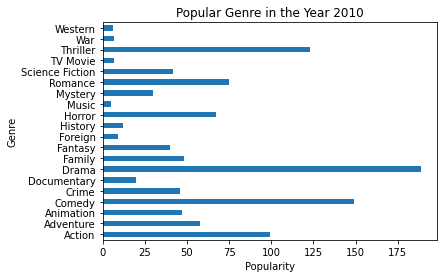

In [20]:
# enter a year to know which genre was popular in that year
plot_genre_year(2010)

<a id='secondque'></a>
### Research Question 2<br/>What kinds of properties are associated with movies that have high revenues?

> Revenue_adj would be compared to three properties to see how positively they influence revenues.

> We would also see how actors/actresses and genres affect revenue.

In [21]:
def revenue_versus(y, df=movie_df, x='revenue_adj'):
    '''
    Function to plot a scatter plot.
    
    Parameters:  df - dataset in which your data is from, to plot.
                       default - movie_df dataset
                  x(str) - a column in the dataset.
                       default - revenue_adj column
                  y(str) - a second column in the dataset
    '''
    x_title = x.capitalize()
    y_title = y.capitalize()
    plt.scatter(data = df, x = 'revenue_adj', y = y);
    plt.title('{} versus {}'.format(x_title, y_title));
    plt.xlabel(x);
    plt.ylabel(y);

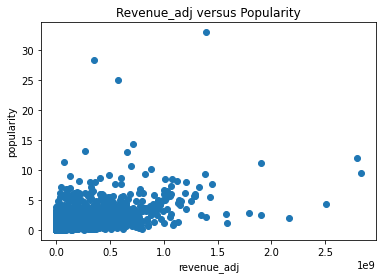

In [22]:
# scatterplot of revenue vs popularity
revenue_versus('popularity')

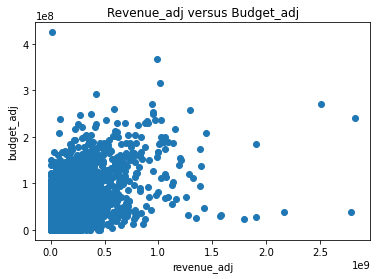

In [23]:
# scatterplot of revenue vs budget
revenue_versus('budget_adj')

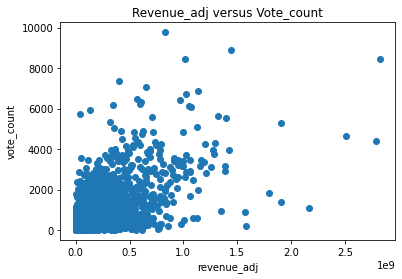

In [24]:
# scatterplot of revenue vs vote count
revenue_versus('vote_count')

In [25]:
print('The correlation between:')
print('revenue and budget is', movie_df['revenue_adj'].corr(movie_df['budget_adj']))
print('revenue and popularity is', movie_df['revenue_adj'].corr(movie_df['popularity']))
print('revenue and vote count is', movie_df['revenue_adj'].corr(movie_df['vote_count']))

The correlation between:
revenue and budget is 0.6411992868221559
revenue and popularity is 0.6067888175267188
revenue and vote count is 0.7042457939342677


> The three properties, budget, popularity and vote count all have positive correlation with revenue. But it should be noted that this does not mean any of the three properties causes high revenues.

In the next three code cells, we would look at how the cast and genre affect revenue.<br/>

First chart: A bar chart of the cast and the mean revenue (revenue_adj) of all the movies they have acted in.<br/>
Second chart: A bar chart of genres and the mean revenue generated.

In [26]:
def CastGenre_revenue(prop='cast', calc='mean', top=10):
    '''
    Function to plot cast or genres against the mean or cumulated sum of revenue.
    
    Parameters:   prop - property, The property to calcute whether cast or genre
                  calc - calculate, what you wish to calculate whether the mean of revenue
                         or the cumulated sum of revenue
                  top -  show the top k properties.
     '''
    # split cast/genres into a dataframe
    if prop == 'cast':
        prop_df = movie_df.assign(cast=movie_df[prop].str.split("|")).explode(prop)
    elif prop == 'genres':
        prop_df = movie_df.assign(genres=movie_df[prop].str.split("|")).explode(prop)
    else:
        print("Error: Either 'cast' or 'genres'")
        
    # calculate the mean/sum and sort the top k
    if calc == 'mean':
        x = prop_df.groupby([prop])['revenue_adj'].mean().sort_values(ascending=False).head(top)
    
    elif calc == 'cumu':
        x = prop_df.groupby([prop])['revenue_adj'].sum().sort_values(ascending=False).head(top)
        calc = 'cumulated sum'
    
    else:
        print("Error: Either 'mean' or 'cumu'")
    
    #plotting
    x.plot(kind='barh');
    
    calc_title = calc.title()
    y_title = prop.title()
    
    plt.title('{} and their {} Revenue'.format(y_title, calc_title));
    plt.xlabel('{} revenue'.format(calc));
    plt.ylabel(prop);

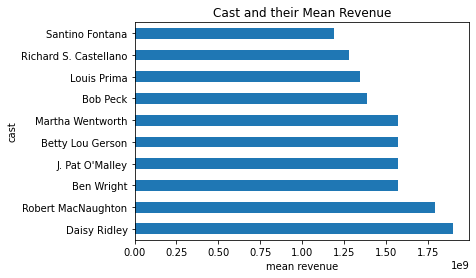

In [27]:
# display the top 10 cast and their average movie revenue
CastGenre_revenue('cast', 'mean')

> The plot above shows the top 10 cast that have acted in movies that  generated the most average revenues.

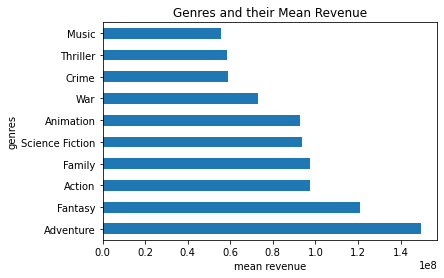

In [28]:
# display the top 10 genres an their average movie revenue
CastGenre_revenue('genres', 'mean')

> The plot above shows the top 10 genres that have generated the most average revenues.

<a id='thirdque'></a>
### Research Question 3<br/>What's the trend of number of movies produced through the period?

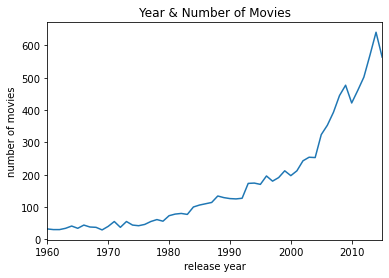

In [29]:
b = movie_df.groupby('release_year').count()['original_title']
b.plot();
plt.title('Year & Number of Movies');
plt.xlabel('release year');
plt.ylabel('number of movies');

In [30]:
print('The number of movies produced in the last six(6)\n', b.tail(6))

The number of movies produced in the last six(6)
 release_year
2010    422
2011    461
2012    502
2013    570
2014    641
2015    564
Name: original_title, dtype: int64


> The number of movies produced kept increasing even though it was not a constant increase from year to year.<br/>
For instance, from the year 2010, the number of movies produce increased but dropped in 2015.

<a id='conclusions'></a>
## Conclusions
> The <a href="#firstque">first question:</a> Which genres are most popular from year to year?<br/>
It was clear that the genre _Drama_ was popular in most of the years<br/>
To know the top k popular genres in a particular year use the ```plot_genre_year(a)``` function where a is a year (eg. plot_genre_year(2015)).

> The <a href="#secondque">second question:</a> What kinds of properties are associated with movies that have high revenues?<br/>
From the visualization, three properties had a positive correlation with the movie's revenue. The three properties were budget, revenue and vote count*.

> The <a href="#thirdque">third question:</a> What's the trend of number of movies produced through the period?<br/>
Number of movies produce are expected toincrease from time to time.

> The movies were grouped by the cast to find the average of the revenue the movies generated. The same was done with the genre. It's safe to say some particular genre helps with high revenue generation. As with the cast, more studies needs to be done to ascertain this.

*Limitation: No information was provided on how vote count was generated, whether it is a review vote or not. Even though popularity and vote has a high positive correlation, we cannot confidently conclude vote count influences high revenue. 